MAE: 4186.509085799611
RMSE: 5799.587190616505


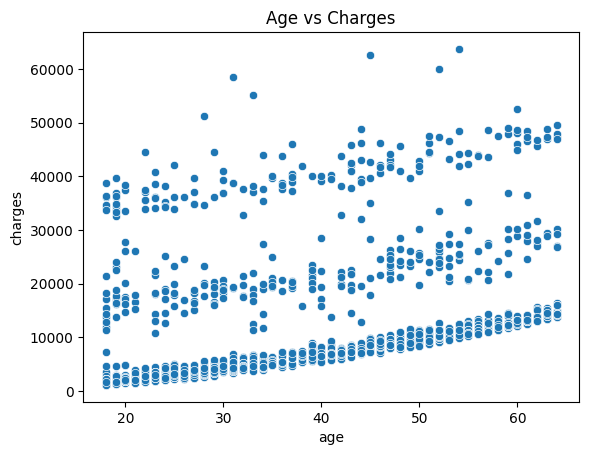

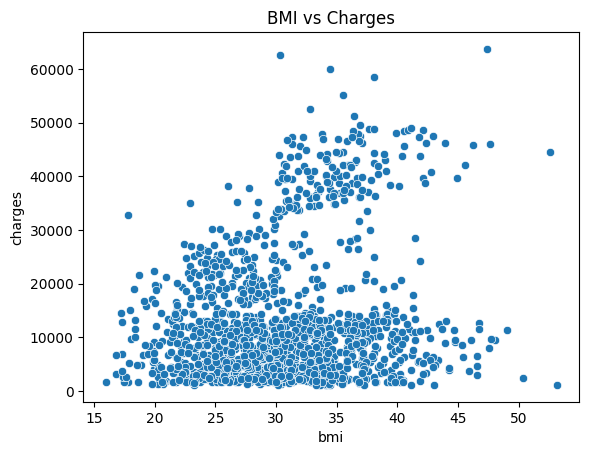

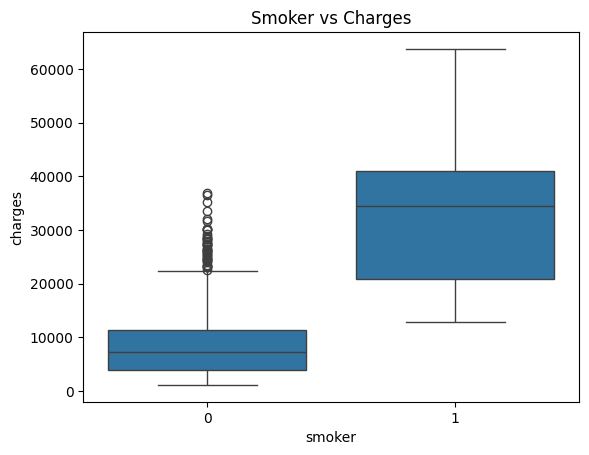

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

data = pd.read_csv("Medical_Cost.csv")
data.head()

data['sex'] = data['sex'].map({'male':0, 'female':1})
data['smoker'] = data['smoker'].map({'no':0, 'yes':1})
data['region'] = data['region'].astype('category').cat.codes

X = data.drop("charges", axis=1)
y = data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

sns.scatterplot(x=data['age'], y=data['charges'])
plt.title("Age vs Charges")
plt.show()

sns.scatterplot(x=data['bmi'], y=data['charges'])
plt.title("BMI vs Charges")
plt.show()

sns.boxplot(x=data['smoker'], y=data['charges'])
plt.title("Smoker vs Charges")
plt.show()
